# The Mathematics of Games

A notebook to go with an outreach event. Slides [here](http://vknight.org/Talks/2015-07-09-Playing-games-with-game-theory/index.html#/).

## Defining a function to simulate people walking in to each other

In [8]:
import random

In [9]:
def walk(number_of_walks):
    """
    Simulate people walking along the pavement
    """
    reds = [random.choice('LR') for k in range(number_of_walks)]
    blues = [random.choice('LR') for k in range(number_of_walks)]
    bumps = sum([reds[k] != blues[k] for k in range(number_of_walks)])
    return bumps

In [10]:
walk(500)

246

## Plotting some of the outputs

Importing libraries that are needed

In [11]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3

sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (10, 6)})
mpld3.enable_notebook()

Here is a histogram of the the number of times people bump in to each other.

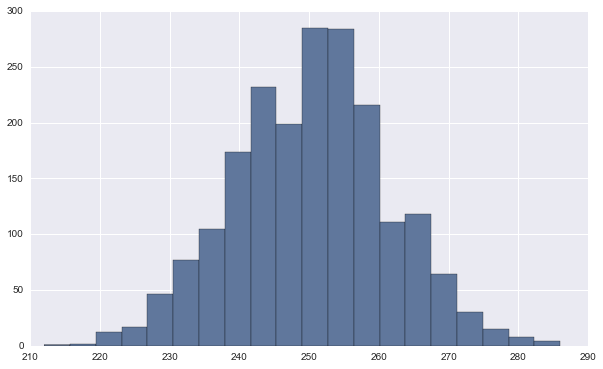

In [12]:
num_of_walks = 500
num_of_reps = 2000
bins = 20
plt.hist([walk(num_of_walks) for k in range(num_of_reps)], bins=bins);

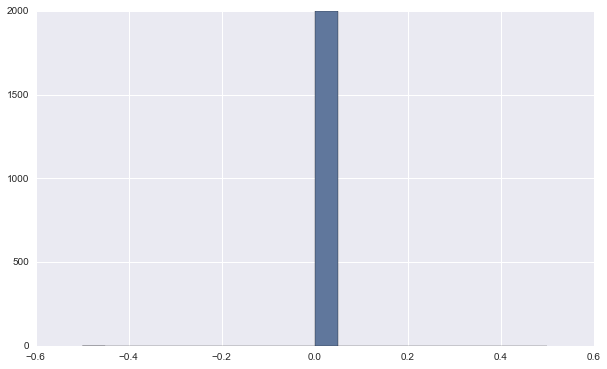

In [13]:
# What if everyone walks on the left?

def walk(number_of_walks):
    """
    Simulate people walking along the pavement
    """
    reds = [random.choice('L') for k in range(number_of_walks)]
    blues = [random.choice('L') for k in range(number_of_walks)]
    bumps = sum([reds[k] != blues[k] for k in range(number_of_walks)])
    return bumps

plt.hist([walk(num_of_walks) for k in range(num_of_reps)], bins=bins);

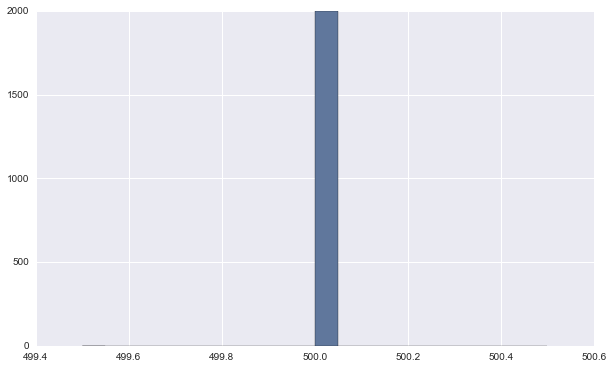

In [14]:
# What if 1 person walks on the left and the other on the right?

def walk(number_of_walks):
    """
    Simulate people walking along the pavement
    """
    reds = [random.choice('L') for k in range(number_of_walks)]
    blues = [random.choice('R') for k in range(number_of_walks)]
    bumps = sum([reds[k] != blues[k] for k in range(number_of_walks)])
    return bumps

plt.hist([walk(num_of_walks) for k in range(num_of_reps)], bins=bins);

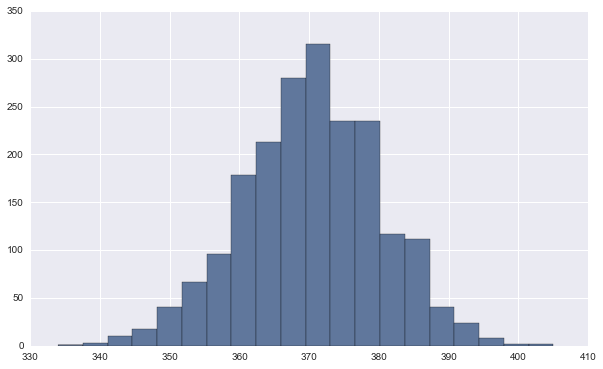

In [15]:
# What if people mix and match?

red_strategy = (20, 80)  # Walk on the left 20 out of 100 times
blue_strategy = (90, 10)  # Walk on the left 90 out of 100 times

def walk(number_of_walks=500, red_strategy=(1,1), blue_strategy=(1,1)):
    """
    Simulate people walking along the pavement
    """
    reds = [random.choice('L' * red_strategy[0]
                                + 'R' * red_strategy[1])
                                  for k in range(number_of_walks)]
    blues = [random.choice('L' * blue_strategy[0]
                                + 'R' * blue_strategy[1])
                                  for k in range(number_of_walks)]
    bumps = sum([reds[k] != blues[k] for k in range(number_of_walks)])
    return bumps

plt.hist([walk(num_of_walks, red_strategy, blue_strategy) for k in range(num_of_reps)], bins=bins);

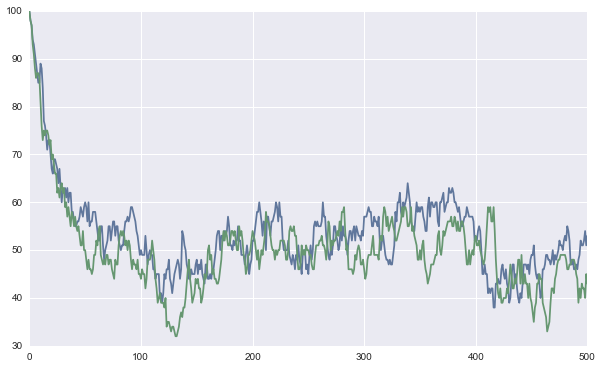

In [16]:
# Evolutionary dynamics with a mutation rate:
size_of_population = 100  # Number of people
number_of_rounds = 500  # How many rounds
mutation_rate = .05  # Chance of changing strategy
death_rate = .05  # Chance of removal

reds = ['L' for k in range(size_of_population)]
blues = ['L' for k in range(size_of_population)]
red_data = [sum([k == 'L' for k in reds])]
blue_data = [sum([k == 'L' for k in reds])]

for rnd in range(number_of_rounds):  # Loop through rounds
    for j, pair in enumerate(zip(reds, blues)):  # Loop through players

        if random.random() < mutation_rate:  # Check if random change
            reds[j], blues[j] = random.choice('LR'), random.choice('LR')

        if pair[0] != pair[1]:  # If bump
            if random.random() < death_rate:  # If mind change
                reds[j], blues[j] =  blues[j], reds[j]

    red_data.append(sum([k == 'L' for k in reds]))  # Data collection
    blue_data.append(sum([k == 'L' for k in blues]))
    
plt.plot(red_data);
plt.plot(blue_data);

# Axelrod

Source code for some of the images and outputs for the slides.

In [17]:
import axelrod

In [18]:
strategies = [s() for s in axelrod.basic_strategies]
tournament = axelrod.Tournament(strategies)
results = tournament.play()

In [19]:
strategies

[Alternator, Cooperator, Defector, Random, Tit For Tat]

In [20]:
results.payoff_matrix

[[2.0, 4.0, 0.5, 2.2565000000000004, 2.515],
 [1.5, 3.0, 0.0, 1.53, 3.0],
 [3.0, 5.0, 1.0, 3.04, 1.0199999999999998],
 [2.249, 3.9800000000000004, 0.49000000000000005, 2.22575, 2.2840000000000003],
 [2.4900000000000007, 3.0, 0.9949999999999999, 2.2715, 3.0]]

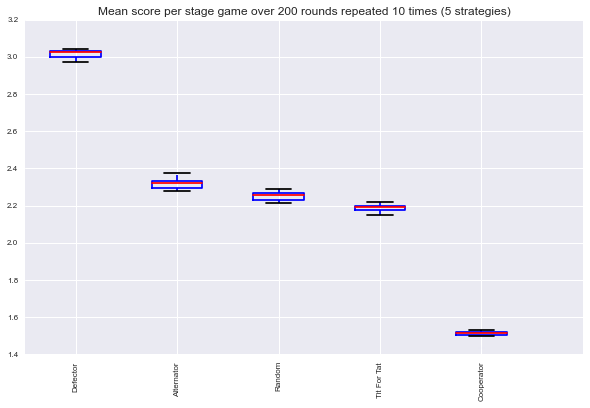

In [21]:
plot = axelrod.Plot(results)
p = plot.boxplot()
p;
p.savefig('./static/box_plot.svg')

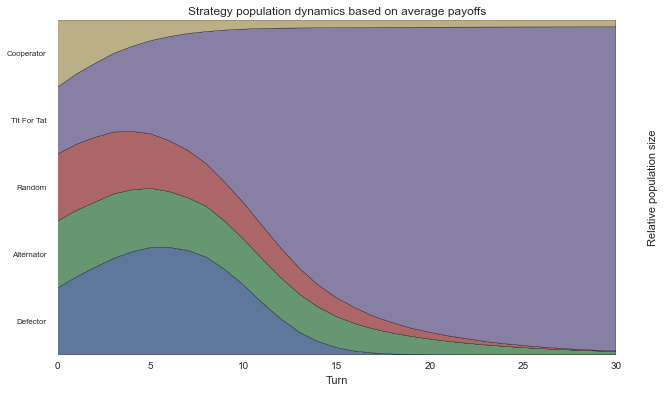

In [23]:
eco = axelrod.Ecosystem(results)
eco.reproduce(30) # Evolve the population over 50 time steps
plot = axelrod.Plot(results)
p = plot.stackplot(eco.population_sizes) # Looks bad but svg is fine (I think it's a mpld3 thing)
p.savefig('static/eco_plot.svg')